# Νευρωνικά Δίκτυα
# Εργαστηριακή Άσκηση 1: ΜΕΡΟΣ 2 - Kaggle Dataset

### **ΟΜΑΔΑ 40**
*   Μαριαλένα Βαγγελάτου (03118141)
*   Νικόλαος Μπλέτσας (03118899)
*   Γεώργιος Τζουμανέκας (03118095)


## Εισαγωγή του dataset

Φορτώνουμε αρχικά τα δεδομένα από το csv αρχείο. 

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.dummy import DummyClassifier
import time
import matplotlib.pyplot as plt
from sklearn.metrics import precision_score, recall_score , f1_score , confusion_matrix , ConfusionMatrixDisplay
from sklearn.neural_network import MLPClassifier
from sklearn.svm import SVC 
from sklearn.svm import LinearSVC
import seaborn as sns

In [ ]:
import warnings
warnings.filterwarnings("ignore", category=Warning)

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
df = pd.read_csv('/content/drive/MyDrive/data.csv')
df

,Bankrupt?,ROA(C) before interest and depreciation before interest,ROA(A) before interest and % after tax,ROA(B) before interest and depreciation after tax,Operating Gross Margin,Realized Sales Gross Margin,Operating Profit Rate,Pre-tax net Interest Rate,After-tax net Interest Rate,Non-industry income and expenditure/revenue,...,Net Income to Total Assets,Total assets to GNP price,No-credit Interval,Gross Profit to Sales,Net Income to Stockholder's Equity,Liability to Equity,Degree of Financial Leverage (DFL),Interest Coverage Ratio (Interest expense to EBIT),Net Income Flag,Equity to Liability
0,1,0.370594,0.424389,0.405750,0.601457,0.601457,0.998969,0.796887,0.808809,0.302646,...,0.716845,0.009219,0.622879,0.601453,0.827890,0.290202,0.026601,0.564050,1,0.016469
1,1,0.464291,0.538214,0.516730,0.610235,0.610235,0.998946,0.797380,0.809301,0.303556,...,0.795297,0.008323,0.623652,0.610237,0.839969,0.283846,0.264577,0.570175,1,0.020794
2,1,0.426071,0.499019,0.472295,0.601450,0.601364,0.998857,0.796403,0.808388,0.302035,...,0.774670,0.040003,0.623841,0.601449,0.836774,0.290189,0.026555,0.563706,1,0.016474
3,1,0.399844,0.451265,0.457733,0.583541,0.583541,0.998700,0.796967,0.808966,0.303350,...,0.739555,0.003252,0.622929,0.583538,0.834697,0.281721,0.026697,0.564663,1,0.023982
4,1,0.465022,0.538432,0.522298,0.598783,0.598783,0.998973,0.797366,0.809304,0.303475,...,0.795016,0.003878,0.623521,0.598782,0.839973,0.278514,0.024752,0.575617,1,0.035490
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6814,0,0.493687,0.539468,0.543230,0.604455,0.604462,0.998992,0.797409,0.809331,0.303510,...,0.799927,0.000466,0.623620,0.604455,0.840359,0.279606,0.027064,0.566193,1,0.029890
6815,0,0.475162,0.538269,0.524172,0.598308,0.598308,0.998992,0.797414,0.809327,0.303520,...,0.799748,0.001959,0.623931,0.598306,0.840306,0.278132,0.027009,0.566018,1,0.038284
6816,0,0.472725,0.533744,0.520638,0.610444,0.610213,0.998984,0.797401,0.809317,0.303512,...,0.797778,0.002840,0.624156,0.610441,0.840138,0.275789,0.026791,0.565158,1,0.097649
6817,0,0.506264,0.559911,0.554045,0.607850,0.607850,0.999074,0.797500,0.809399,0.303498,...,0.811808,0.002837,0.623957,0.607846,0.841084,0.277547,0.026822,0.565302,1,0.044009


## Επισκόπηση του dataset

In [ ]:
data = df.to_numpy()
print("The dataset contains", data.shape[0],"samples," ,data.shape[1]-1, "features and a label.")
print("\n")
print("The data are shown here:")
print(data)

The dataset contains 6819 samples, 95 features and a label.


The data are shown here:
[[1.         0.37059426 0.42438945 ... 0.56405011 1.         0.01646874]
 [1.         0.46429094 0.53821413 ... 0.57017495 1.         0.02079431]
 [1.         0.42607127 0.49901875 ... 0.56370608 1.         0.01647411]
 ...
 [0.         0.47272461 0.533744   ... 0.5651584  1.         0.09764874]
 [0.         0.50626432 0.5599106  ... 0.56530151 1.         0.04400945]
 [0.         0.49305319 0.57010467 ... 0.56516694 1.         0.23390224]]


Πρόκειται για ένα dataset που περιέχει πληροφορίες για χρεοκοπημένες και μη εταιρίες από το 1999 έως το 2009 από το Taiwan Economic Journal. Το dataset αποτελέιται από 6819 δείγματα, καθένα των οποίων έχει 95 χαρακτηριστικά, που αντιστοιχούν σε χρηματιστηριακούς δείκτες(FRs) και μια binary ετικέτα.

Το classification γίνεται σε δύο κλασεις: χρεοκοπημένη (τιμή 1) και μη χρεοκοπημένη (τιμή 0).

Αρχικά ελέγχουμε την ισορροπία του dataset:

In [ ]:
np_labels = np.array(df['Bankrupt?'].values)

bankrupt = len(np_labels[np_labels==1])
not_bankrupt = len(np_labels[np_labels==0])
print(bankrupt,"samples are for bankrupt companies and",not_bankrupt," samples are for non-bankrupt companies")

print("The balance is", round(bankrupt/len(np_labels),2) * 100, "% in favour of the bankrupt samples")

220 samples are for bankrupt companies and 6599  samples are for non-bankrupt companies
The balance is 3.0 % in favour of the bankrupt samples


Παρατηρούμε ότι το dataset είναι υπερβολικά unbalanced με έναν πολύ μικρό αριθμό δειγμάτων στην κλάση 1 (χρεοκοπημένες εταιρίες) σε σχέση με τον αριθμό δειγμάτων στην κλάση 0 (μη χρεοκοπημένες εταιρίες). Τονίζουμε πως για την out-of-the-box τεχνική δε θα βελτιώσουμε την ισορροπία του set, κάτι που θα κάνουμε στην βελτιστοποίηση των ταξινομητών.

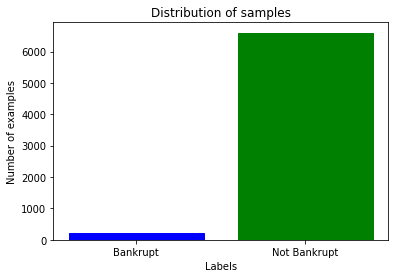

In [ ]:
y = [bankrupt, not_bankrupt]
x = ['Bankrupt', 'Not Bankrupt']

bars = plt.bar(x,y)
bars[0].set_color('blue')
bars[1].set_color('green')
plt.title("Distribution of samples")
plt.ylabel("Number of examples")
plt.xlabel("Labels")
plt.show()

Αξίζει να σημειωθεί ότι δεν υπάρχουν κενές τιμές στα χαρακτηριστικά, όπως επιβεβαιώνεται και παρακάτω:

In [ ]:
df.isnull().values.any()

False

Παρατηρούμε ότι από τα 95 χαρακτηριστικά τα 93 παίρνουν τιμές float και 2 παίρνουν τιμές binary (int όπως φαίνεται, αλλά είναι μόνο οι τιμές 1 και 0 άρα πρακτικά binary). Η ετικέτα παίρνει επίσης binary τιμές.

In [ ]:
df.dtypes

Bankrupt?                                                     int64
 ROA(C) before interest and depreciation before interest    float64
 ROA(A) before interest and % after tax                     float64
 ROA(B) before interest and depreciation after tax          float64
 Operating Gross Margin                                     float64
                                                             ...   
 Liability to Equity                                        float64
 Degree of Financial Leverage (DFL)                         float64
 Interest Coverage Ratio (Interest expense to EBIT)         float64
 Net Income Flag                                              int64
 Equity to Liability                                        float64
Length: 96, dtype: object

Συγκεκριμένα μελετώντας το dataset εστιάζουμε την προσοχή μας στους εξης binary δείκτες:

* Liability-Assets Flag: 1 if Total Liability exceeds Total Assets, 0 otherwise

* Net Income Flag: 1 if Net Income is Negative for the last two years, 0 otherwise

In [ ]:
print(df[" Liability-Assets Flag"].value_counts()) #count the values for Liability-Assets Flag
print("\n")
print(df[" Net Income Flag"].value_counts()) #count the values for Net Income Flag

0    6811
1       8
Name:  Liability-Assets Flag, dtype: int64


1    6819
Name:  Net Income Flag, dtype: int64


Άρα βλέπουμε ότι οι τιμές για το χαρακτηριστικό Net Income Flag είναι πάντα 1. Άρα μπορούμε να κάνουμε drop αυτή την στήλη:

In [ ]:
df = df.drop(" Net Income Flag", axis=1)

## Ταξινομητές

Θα δουλέψουμε με δύο ταξινομητές:

* Mylti-Layer Perceptron (MLP)

* Support Vector Machines (SVM)

Για χάριν σύγκρισης των επιδόσεων παραθέτουμε και τους dummy ταξινομητές ως baseline και με όλες τις παραμέτρους σε default τιμές, όπως ζητήθηκε κι από την εκφώνηση. Οι τύποι των dummy ταξινομητών που θα μελετήσουμε είναι:

* uniform: ο ταξινομητής προβλέπει τυχαία και ομοιόμορφα
* constant: ο ταξινομητής προβλέπει πάντα μία κατηγορία που διαλέγουμε (gamma και hadron)
* stratified: ο ταξινομητής προβλέπει διατηρώντας την κατανομή των κλάσεων στο training set
* most_frequent: ο ταξινομητής προβλέπει πάντα την πιο συχνή κατηγορία στο training set

## Μετρικές

Αρχικά θέλουμε να δούμε πώς συμπεριφέρονται οι ταξινομητές χωρίς καμία βελτιστοποίηση (out-of-the-box). Επομένως, θα χρησιμοποιήσουμε το dataset ως έχει και θα αξιολογήσουμε την επίδοσή τους με βάση μετρικές που ενδείκνυνται για ένα unbalanced set. Έτσι, δεν θα χρησιμοποιήσουμε το accuracy, μα άλλες μετρικές όπως το F1-score (τα precision και recall μπορούν επίσης να μελετηθούν στο συγκεκριμένο πρόβλημα κατηγοριοποίησης). Έμφαση θα δoθούν ειδικότερα στις παρακάτω μετρικές:

* confusion matrix
* f1-micro average (F1-score που "ζυγίζει" κάθε δείγμα ισότιμα)
* f1-macro average (F1-score που "ζυγίζει" κάθε τάξη ισότιμα)

## Train-test split

Αρχικά χωρίζουμε το dataset σε χαρακτηριστικά (feats) και ετικέτες (labels).

In [ ]:
data = df.to_numpy() #γιατί έχουμε κάνει drop τη μία στήλη
labels = df['Bankrupt?'].to_numpy()
feats = data[:,1:]

In [ ]:
print("The array of Labels of the Dataset: ")
print(labels)
print("\n")
print("The array of Feats of the Dataset: ")
print(feats)

The array of Labels of the Dataset: 
[1 1 1 ... 0 0 0]


The array of Feats of the Dataset: 
[[0.37059426 0.42438945 0.40574977 ... 0.02660063 0.56405011 0.01646874]
 [0.46429094 0.53821413 0.51673002 ... 0.26457682 0.57017495 0.02079431]
 [0.42607127 0.49901875 0.47229509 ... 0.02655472 0.56370608 0.01647411]
 ...
 [0.47272461 0.533744   0.52063815 ... 0.02679116 0.5651584  0.09764874]
 [0.50626432 0.5599106  0.55404465 ... 0.02682205 0.56530151 0.04400945]
 [0.49305319 0.57010467 0.54954762 ... 0.02679295 0.56516694 0.23390224]]


Τώρα προβαίνουμε στον διαχωρισμό του συνόλου δεδομένων σε σύνολο εκπαίδευσης (train set) και σύνολο τεστ (test set) με 30% των δειγμάτων στο test set, μέσω της συνάρτησης της Scikit-learn. Ο διαχωρισμός 70/30 είναι καλή επιλογή, καθώς θέλουμε ένα μεγάλο αριθμό δειγμάτων στο train set.

In [ ]:
x_train,x_test,y_train,y_test = train_test_split(feats,labels,test_size=0.3,random_state=0)

## Out-of-the-box

### *dummy*

Ορίζουμε τους ταξινομητές Dummy που εξηγήσαμε και παραπάνω και παίρνουμε τις μετρικές που θέλουμε για να τους συγκρίνουμε.

In [ ]:
def DummyClassification(x_train,y_train,x_test,y_test):
    
    scores, predictions, fit_times, pred_times = {}, {}, {}, {}

    ## Initialization
    
    dc_uniform  = DummyClassifier(strategy="uniform")
    dc_const_0 = DummyClassifier(strategy="constant",constant= 0)
    dc_const_1 = DummyClassifier(strategy="constant",constant= 1)
    dc_stratified = DummyClassifier(strategy="stratified")
    dc_frequent = DummyClassifier(strategy="most_frequent")

    ## Fit times
    
    start_time = time.time()
    dc_uniform.fit(x_train, y_train)
    fit_times['uniform'] = time.time()-start_time
    
    start_time = time.time()
    dc_const_0.fit(x_train, y_train)
    fit_times['const_0'] = time.time()-start_time
    
    start_time = time.time()
    dc_const_1.fit(x_train, y_train)
    fit_times['const_1'] = time.time()-start_time
    
    start_time = time.time()
    dc_stratified.fit(x_train, y_train)
    fit_times['stratified'] = time.time()-start_time
    
    start_time = time.time()
    dc_frequent.fit(x_train,y_train)
    fit_times['frequent'] = time.time()-start_time
    
    ## Predictions and prediction times
    
    start_time = time.time()
    predictions['uniform']  = dc_uniform.predict(x_test)
    pred_times['uniform'] = time.time()-start_time
    
    start_time = time.time()
    predictions['const_0']  = dc_const_0.predict(x_test)
    pred_times['const_0'] = time.time()-start_time
    
    start_time = time.time()
    predictions['const_1']  = dc_const_1.predict(x_test)
    pred_times['const_1'] = time.time()-start_time
    
    start_time = time.time()
    predictions['stratified']  = dc_stratified.predict(x_test)
    pred_times['stratified'] = time.time()-start_time
    
    start_time = time.time()
    predictions['frequent'] = dc_frequent.predict(x_test)
    pred_times['frequent'] = time.time()-start_time

    ## Score
    
    scores['uniform']  = dc_uniform.score(x_test, y_test)
    scores['const_0']  = dc_const_0.score(x_test, y_test)
    scores['const_1']  = dc_const_1.score(x_test, y_test)
    scores['stratified']  = dc_stratified.score(x_test, y_test)
    scores['frequent'] = dc_frequent.score(x_test,y_test)
    
    return predictions, scores, fit_times, pred_times

In [ ]:
predictions, _, _, _ = DummyClassification(x_train, y_train, x_test, y_test)

print("Confusion Matrices of the Dummy Classifier: \n")
for strategy in predictions:
  print(f'For strategy -> {strategy}:\n {confusion_matrix(y_test, predictions[strategy])}')

Confusion Matrices of the Dummy Classifier: 

For strategy -> uniform:
 [[990 997]
 [ 31  28]]
For strategy -> const_0:
 [[1987    0]
 [  59    0]]
For strategy -> const_1:
 [[   0 1987]
 [   0   59]]
For strategy -> stratified:
 [[1914   73]
 [  59    0]]
For strategy -> frequent:
 [[1987    0]
 [  59    0]]


Ενδεικτικά, κάνουμε plot το confusion matrix του dummy classifier με στρατηγική stratified.

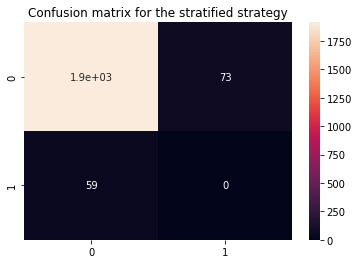

In [ ]:
cm = sns.heatmap(confusion_matrix(y_test, predictions["stratified"]), annot=True)
cm.plot()
plt.title("Confusion matrix for the stratified strategy")
plt.show()

Για τη στρατηγική constant, δεν έχουμε καμία πρόβλεψη για την αντίθετη κλάση, γι'αυτό δεν έχουμε και false positives / false negatives.

Αντίστοιχα στο most frequent, όπου η κλάση 0 εμφανίζεται υπερβολικά περισσότερες φορές, έχουμε ίδιο αποτέλεσμα με την constant_0 στρατηγική.

Η uniform ναι μεν παράγει τυχαία αποτελέσματα αλλά με ομοιόμορφη κατανομή και βλέπουμε πως αποτυγχάνει στην κλάση 1, καθώς η ομοιόμορφη κατανομή ευνοεί την πολυπληθέστερη κλάση.

Στην stratified έχουμε επίσης πολλά miss, ιδιαίτερα για στην κλάση 1 καθώς τα predictions γίνονται πιθανοτικά. Αφού λοιπόν, τα συντριπτικά περισσότερα κλάσεις δείγματα ανήκουν στην κλάση 0, προφανώς η πιθανότητα "γέρνει" συνεχώς προς αυτή.

Παρατηρούμε από τις μετρικές ότι προκύπτουν αποδόσεις υπερβολικά καλές για να είναι αληθινές.

In [ ]:
print("F1 Score of the Dummy Classifier: \n")
for strategy in predictions:
  print(f'For strategy -> {strategy}:')
  print(f'\tMicro: {f1_score(y_test, predictions[strategy], average = "micro")}')
  print(f'\tMacro: {f1_score(y_test, predictions[strategy], average = "macro")}\n')

F1 Score of the Dummy Classifier: 

For strategy -> uniform:
	Micro: 0.4975562072336266
	Macro: 0.3549525987281149

For strategy -> const_0:
	Micro: 0.9711632453567938
	Macro: 0.4926853458963551

For strategy -> const_1:
	Micro: 0.028836754643206255
	Macro: 0.028028503562945367

For strategy -> stratified:
	Micro: 0.9354838709677419
	Macro: 0.4833333333333333

For strategy -> frequent:
	Micro: 0.9711632453567938
	Macro: 0.4926853458963551



Παρατηρούμε ότι χρησιμοποιώντας f1-macro έχουμε πολύ χαμηλές αποδόσεις, πράγμα αναμενόμενο, καθώς η macro δεν λαμβάνει υπόψιν την ανισοροπία του set, δηλαδή υπολογίζει το precision ξεχωριστά για κάθε κλάση και μετά διαιρεί απλά με τον αριθμό των κλάσεων. Αν χρησιμοποιήσουμε όμως την f1-micro, τότε παρατηρούμε πιο σωστά αποτελέσματα αφού η micro "ζυγίζει" την συνεισφορά της κάθε κλάσης.

Ωστόσο η ακρίβεια είναι πολύ μικρή στην πραγματικότητα αν δούμε τους confusion matrices. Αυτό είναι λογικό, καθώς τα δεδομένα είναι ακραία unbalanced και δεν υπάρχει περιθώριο "εκπαίδευσης" του ταξινομητή, πόσο μάλλον του dummy classifier που είναι αδύναμος από την φύση του.

### *MLP*

In [ ]:
mlp =  MLPClassifier()    # Multi-Layer Perceptron
mlp.fit(x_train, y_train)
predictions["mlp"] = mlp.predict(x_test)

In [ ]:
mlp_cm = confusion_matrix(y_test, predictions["mlp"])
print("Confusion matrix for the MLP:")
print(mlp_cm)

print("\n")
print("F1 Score of the MLP Classifier: \n")
print(f'\tMicro: {f1_score(y_test, predictions["mlp"], average = "micro")}')
print(f'\tMacro: {f1_score(y_test, predictions["mlp"], average = "macro")}\n')

Confusion matrix for the MLP:
[[1945   42]
 [  50    9]]


F1 Score of the MLP Classifier: 

	Micro: 0.9550342130987293
	Macro: 0.5702661978905074



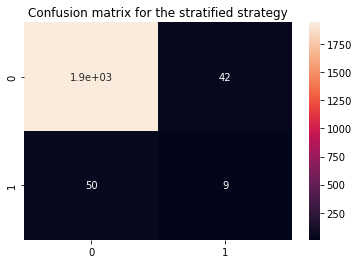

In [ ]:
cm = sns.heatmap(confusion_matrix(y_test, predictions["mlp"]), annot=True)
cm.plot()
plt.title("Confusion matrix for the stratified strategy")
plt.show()

Και εδώ βλέπουμε καλύτερα αποτελέσματα σε σχέση με τους προηγούμενους classifiers. Συγκεκριμένα βλέπουμε καλύτερη απόδοση στην κλάση 0, πιθανότατα γιατί ο classifier έχει μάθει καλύτερα να διακρίνει entries από αυτή την κλάση, αφού το dataset μας είναι unbalanced με κλίση προς την κλάση 0.

### *SVM*

Η παράμετρος kernel της SVC καθορίζει την μέθοδο της ταξινόμησης ως:
* linear
* rbf
* sigmoid
* poly

#### linear

In [ ]:
model_svm_linear = LinearSVC(dual=False)  # Support vector classifier
model_svm_linear.fit(x_train, y_train)
predictions["svm_linear"] = model_svm_linear.predict(x_test)

Confusion matrix for the SVM Linear:
[[1975   12]
 [  59    0]]


F1 Score of the SVM Linear Classifier: 

	Micro: 0.9652981427174976
	Macro: 0.4911713504103457



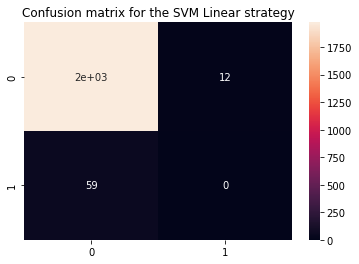

In [ ]:
svm_linear_cm = confusion_matrix(y_test, predictions["svm_linear"])
print("Confusion matrix for the SVM Linear:")
print(svm_linear_cm)

print("\n")
print("F1 Score of the SVM Linear Classifier: \n")
print(f'\tMicro: {f1_score(y_test, predictions["svm_linear"], average = "micro")}')
print(f'\tMacro: {f1_score(y_test, predictions["svm_linear"], average = "macro")}\n')

cm = sns.heatmap(confusion_matrix(y_test, predictions["svm_linear"]), annot=True)
cm.plot()
plt.title("Confusion matrix for the SVM Linear strategy")
plt.show()

#### rbf

In [ ]:
model_svm_rbf = SVC( kernel= 'rbf') #rbf
model_svm_rbf.fit(x_train, y_train)
predictions["svm_rbf"] = model_svm_rbf.predict(x_test)

Confusion matrix for the SVM rbf:
[[1987    0]
 [  59    0]]


F1 Score of the SVM rbf Classifier: 

	Micro: 0.9711632453567938
	Macro: 0.4926853458963551



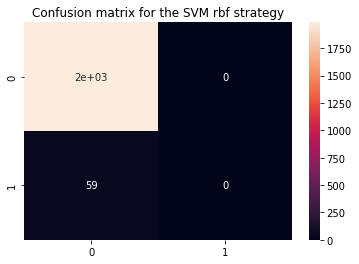

In [ ]:
svm_rbf_cm = confusion_matrix(y_test, predictions["svm_rbf"])
print("Confusion matrix for the SVM rbf:")
print(svm_rbf_cm)

print("\n")
print("F1 Score of the SVM rbf Classifier: \n")
print(f'\tMicro: {f1_score(y_test, predictions["svm_rbf"], average = "micro")}')
print(f'\tMacro: {f1_score(y_test, predictions["svm_rbf"], average = "macro")}\n')

cm = sns.heatmap(confusion_matrix(y_test, predictions["svm_rbf"]), annot=True)
cm.plot()
plt.title("Confusion matrix for the SVM rbf strategy")
plt.show()

#### poly

In [ ]:
model_svm_poly = SVC( kernel= 'poly') #poly
model_svm_poly.fit(x_train, y_train)
predictions["svm_poly"] = model_svm_poly.predict(x_test)

Confusion matrix for the SVM poly:
[[1987    0]
 [  59    0]]


F1 Score of the SVM poly Classifier: 

	Micro: 0.9711632453567938
	Macro: 0.4926853458963551



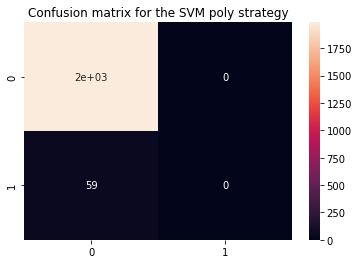

In [ ]:
svm_poly_cm = confusion_matrix(y_test, predictions["svm_poly"])
print("Confusion matrix for the SVM poly:")
print(svm_poly_cm)

print("\n")
print("F1 Score of the SVM poly Classifier: \n")
print(f'\tMicro: {f1_score(y_test, predictions["svm_poly"], average = "micro")}')
print(f'\tMacro: {f1_score(y_test, predictions["svm_poly"], average = "macro")}\n')

cm = sns.heatmap(confusion_matrix(y_test, predictions["svm_poly"]), annot=True)
cm.plot()
plt.title("Confusion matrix for the SVM poly strategy")
plt.show()

#### sigmoid

In [ ]:
model_svm_sigmoid = SVC( kernel= 'sigmoid') #sigmoid
model_svm_sigmoid.fit(x_train, y_train)
predictions["svm_sigmoid"] = model_svm_sigmoid.predict(x_test)

Confusion matrix for the SVM sigmoid:
[[1942   45]
 [  58    1]]


F1 Score of the SVM sigmoid Classifier: 

	Micro: 0.9496578690127078
	Macro: 0.4966068293382063



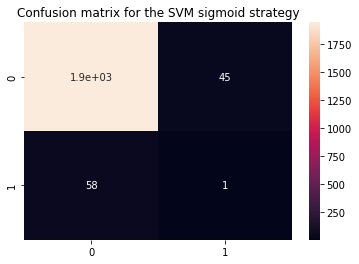

In [ ]:
svm_sigmoid_cm = confusion_matrix(y_test, predictions["svm_sigmoid"])
print("Confusion matrix for the SVM sigmoid:")
print(svm_sigmoid_cm)

print("\n")
print("F1 Score of the SVM sigmoid Classifier: \n")
print(f'\tMicro: {f1_score(y_test, predictions["svm_sigmoid"], average = "micro")}')
print(f'\tMacro: {f1_score(y_test, predictions["svm_sigmoid"], average = "macro")}\n')

cm = sns.heatmap(confusion_matrix(y_test, predictions["svm_sigmoid"]), annot=True)
cm.plot()
plt.title("Confusion matrix for the SVM sigmoid strategy")
plt.show()

### Markdown πίνακας

| Classifier\Score | F1 - micro | F1 - macro |
|:----:|:------:|:-------:|
| **uniform** | 0.497 |0.354 |
| **constant 0** |0.971| 0.492 |
| **constant 1**|0.029 |0.028 |
| **startified**|0.935 | 0.483|
| **most frequent**|0.971 |0.492 |
| **MLP**|0.955 | 0.570  |
| **SVM_linear**| 0.965 | 0.491 |
| **SVM_rbf** | 0.971 | 0.492 |
| **SVM_poly** | 0.971 | 0.492|
| **SVM_sigmoid** | 0.949 | 0.496|

### *Bar plot για τα F1 scores*

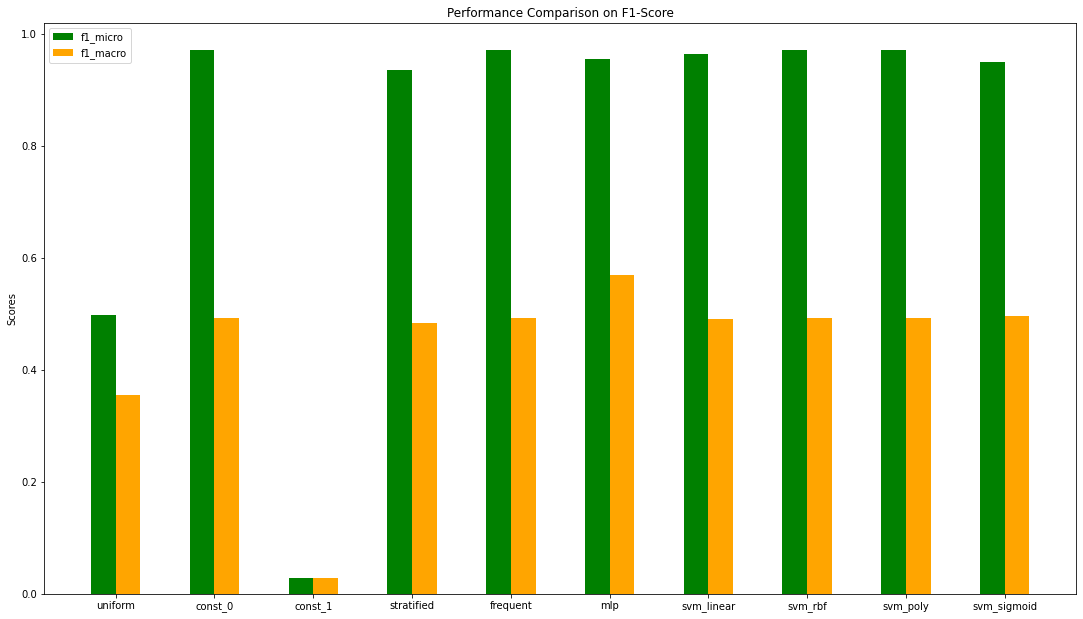

In [ ]:
f1_macros, f1_micros, labels = [],[],[]
for clf in predictions:  
    f1_micros.append(f1_score(y_test,predictions[clf],average='micro'))
    f1_macros.append(f1_score(y_test,predictions[clf],average='macro'))
    labels.append(clf)

x = np.arange(len(labels))
width = 0.25

fig, ax = plt.subplots()
rects1 = ax.bar(x - width/2, f1_micros, width, label='f1_micro', color = "green")
rects2 = ax.bar(x + width/2, f1_macros, width, label='f1_macro', color = "orange")

fig.set_size_inches(18.5, 10.5)
ax.set_ylabel('Scores')
ax.set_title('Performance Comparison on F1-Score')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()

plt.show()

Παρατηρούμε ότι η μετρική macro δίνει χειρότερη απόδοση (47-55%) σε σχέση με την micro (90-94%). Σε ένα unbalanced dataset επομένως, η macro αστοχεί αφού η κατανομή μεταξύ των δύο κλάσεων είναι άνιση. Οι καλές επιδόσες της micro δεν πρέπει να μας ξεγελάνε, καθώς ευνοούν την minority class. Είναι σημαντικό να προβλέπεται ορθά πότε μια εταιρία θα χρεοκοπήσει, κι όχι απλά αν δεν θα χρεοκοπήσει. Οπότε η f1-macro μετρική θα είχε περισσότερη αξία εδώ να είναι υψηλή.

Παρατηρούμε ότι  οι μετρικές για τους ταξινομητές SVM και MLP επίσης δεν είναι χειρότερες από αυτές των Dummy ταξινομητών. Ειδικότερα ο constant-0 και ο most frequent έχουν το ίδιο καλό F1-score με δύο παραλλαγές του SVM. Γιαυτό είναι αναγκαίο να υπάρξει βελτιστοποίηση τόσο του dataset όσο και των ταξινομητών.

##  Βελτιστοποίηση

### *Κανονικοποίηση δεδομένων*

Χρησιμοποιούμε έναν minmaxScaler για την κανονικοποίηση των δεδομένων. Είναι σημαντικό να κανονικοποιήσουμε τα δεδομένα μας, καθώς στην συνέχεια θα εφαρμόσουμε κάποιο VarianceThreshold > 0 για την βελτιστοποίηση των ταξινομητών. Με αυτόν τον τρόπο απαλείφουμε μεταβλητές με μεγάλες μέσες τιμές οι οποίες θα δίνουν μεγαλύτερη τιμή variance.

In [ ]:
from scipy import stats as st
import numpy as np

from sklearn import preprocessing

# το ίδιο με  min max scaling
min_max_scaler = preprocessing.MinMaxScaler()
x_train_minmax = min_max_scaler.fit_transform(x_train)
#print(x_train_minmax, "\n")
x_test_minmax = min_max_scaler.transform(x_test)
#print(x_test_minmax)
# παρατηρούμε ότι στο test set έχουμε τιμές εκτός [0,1] γιατί στο train set το min ήταν -1 και το max 2

print(x_test_minmax.mean(axis=0))
print(x_test_minmax.std(axis=0))

[4.94176191e-01 5.68573685e-01 5.64115134e-01 9.14098213e-01
 9.12867174e-01 9.98980138e-01 7.97450979e-01 8.09347566e-01
 3.03608648e-01 7.81618298e-01 2.08087569e-01 1.89180276e-01
 6.30110561e-01 1.84143488e-02 1.14471004e-01 1.91326473e-01
 1.91290039e-01 1.91317720e-01 1.63618721e-01 3.23798756e-01
 2.44379290e-04 1.09901784e-01 1.77182220e-01 2.22978766e-02
 8.48119522e-01 6.89420163e-01 6.89399710e-01 2.17571265e-01
 5.46184772e-01 7.07206910e-05 2.64168002e-01 5.00161045e-01
 5.63251324e-12 8.38779577e-04 7.02795044e-01 1.59847465e-03
 1.11150214e-01 8.88849786e-01 7.87030515e-03 1.52269222e-01
 5.81277832e-03 1.09791570e-01 1.37932852e-01 2.15604923e-01
 1.43778551e-01 1.52619124e-03 8.71728257e-04 2.09833401e-01
 1.02364672e-01 3.92149119e-02 3.91117802e-04 4.01340282e-01
 5.25552738e-04 8.16189845e-01 4.11787195e-01 5.24453738e-01
 1.27279634e-01 4.17827608e-04 5.30492963e-03 8.90276002e-02
 4.15107279e-01 5.95081132e-01 6.68953130e-03 7.60869462e-01
 8.92097804e-01 1.186804

### Μείωση διαστάσεων

Έχουμε ήδη αφαιρέσει μια στήλη που όλες οι τιμές ήταν ίσες, αλλά για έλεγχο βρίσκουμε παρακάτω και τον πίνακα με τις διακυμάνσεις όλων των τιμών των χαρακτηριστικών και τεστάρουμε ότι δεν υπάρχει χαρακτηριστικό με μηδενική διακύμανση:

In [ ]:
xvar = np.var(x_train, axis=0)
print(0 in xvar) #checks for zeros in the array of the variances

False


Επιλέγουμε ως threshold για τη διακύμανση τον αριθμό 0,001 που είναι αρκετά μικρός ώστε να μειώσουμε τις διαστάσεις.

In [ ]:
from sklearn.feature_selection import VarianceThreshold

#print(x_train)
# αρχικοποιούμε έναν selector
selector = VarianceThreshold(threshold=0.001)
# όπως κάναμε και με τους ταξινομητές τον κάνουμε fit στα δεδομένα εκπαίδευσης
train_reduced = selector.fit_transform(x_train_minmax)
#print(train_reduced)
mask = selector.get_support()
#print(mask)

#print(x_test.shape)

test_reduced = selector.transform(x_test_minmax)
#print(test_reduced)
print(train_reduced.shape)

(4773, 45)


### Εξισορρόπηση δεδομένων

Όπως έχουμε παρατηρήσει το dataset μας είναι unbalanced. Για να εξισσοροπούμε το dataset μας θα δοκιμάσουμε την τεχνική oversampling με την οποία επιλέγουμε τυχαία ορισμένα παραδείγματα από τις λιγότερο συχνές κατηγορίες και τα επαναλαμβάνουμε. Προτιμούμε αυτή συγκριτικά με το undersampling καθώς έτσι δεν χάνουμε δεδομένα εκπαίδευσης.

Θα πειραματιστούμε με δύο τεχνικές oversampling, την RandomOverSampler η οποία απλά εναλαμβάνει τυχαία ορισμένα παραδείγματα από τις λιγότερο συχνές κατηγορίες και την Smote η οποία δεν επαναλαμβάνει τις ήδη υπάρχουσες τιμές στην λιγότερα συχνή κατηγορία, αλλά δημιουργεί δικά της τεχνικά δεδομένα χρησιμοποιώντας τους γείτονες που υπάρχουν στην λιγότερο συχνή κατηγορία.

In [ ]:
print(df['Bankrupt?'].value_counts())  #δείγματα που αντιστοιχουν ανά κλάση

0    6599
1     220
Name: Bankrupt?, dtype: int64


In [ ]:
!pip install -U imbalanced-learn

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 199 kB 6.6 MB/s 
     |████████████████████████████████| 199 kB 63.9 MB/s 
  Attempting uninstall: imbalanced-learn
    Found existing installation: imbalanced-learn 0.8.1
    Uninstalling imbalanced-learn-0.8.1:
      Successfully uninstalled imbalanced-learn-0.8.1


In [ ]:
#RandomOverSampler
from imblearn.over_sampling import RandomOverSampler
from sklearn.preprocessing import MultiLabelBinarizer
from collections import Counter

ros = RandomOverSampler(random_state = 0)
x_train_over, y_train_over = ros.fit_resample(train_reduced,y_train)


freq=Counter(y_train_over)
print(freq)            #dictionary με συχνότητες

print("Size of new x_train:", x_train_over.shape)
print("Size of new y_train:", y_train_over.shape)

Counter({0: 4612, 1: 4612})
Size of new x_train: (9224, 45)
Size of new y_train: (9224,)


In [ ]:
#SMOTE
from imblearn.over_sampling import SMOTE, ADASYN

smote= SMOTE()
x_train_smote, y_train_smote = smote.fit_resample(train_reduced, y_train)

freq=Counter(y_train_over)
print(freq)            #dictionary με συχνότητες

print("Size of new x_train:", x_train_smote.shape)
print("Size of new y_train:", y_train_smote.shape)

Counter({0: 4612, 1: 4612})
Size of new x_train: (9224, 45)
Size of new y_train: (9224,)


Βλέπουμε πως πλέον η αναλογία των κλάσεων είναι 1:1 και συνεπώς το training set είναι ισορροπημένο. Το Oversamping έγινε μόνο στο training set, αφού το test set θέλουμε να μείνει αναλοίωτο.

### PCA

Με τη τεχνική PC μπορούμε να συνοψίσουμε το περιεχόμενο πληροφοριών σε πίνακες δεδομένων μέσω ενός μικρότερου συνόλου δεικτών που μπορούν να οπτικοποιηθούν και να αναλυθούν πιο εύκολα.

In [ ]:
from sklearn.decomposition import PCA

#SMOTE
#from imblearn.over_sampling import SMOTE

#smote= SMOTE()
#x_train_smote, y_train_smote = smote.fit_resample(x_train_minmax , y_train)

from imblearn.over_sampling import RandomOverSampler
from sklearn.preprocessing import MultiLabelBinarizer
from collections import Counter

#τα κάνω oversampler για να τσεκάρω αν αλλάζει κάτι στο plot

pca = PCA(n_components=45)

#principalComponents = pca.fit_transform(x_train_smote)
principalComponents = pca.fit_transform(x_train_over)

print("The first component contains {:.2f}% of the total information and the second one contains {:.2f}%".format( (100*pca.explained_variance_ratio_[0]),(100*pca.explained_variance_ratio_[1]) ) )
print("In total the 2 components contains {:.2f}% of the total information".format((100*pca.explained_variance_ratio_[0])+(100*pca.explained_variance_ratio_[1])) )

The first component contains 17.15% of the total information and the second one contains 13.85%
In total the 2 components contains 31.01% of the total information


[0.17153836 0.31008333 0.41177552 0.5041468  0.58027608 0.65304617
 0.71834248 0.77473231 0.82506216 0.86389657 0.8954528  0.91276972
 0.92806618 0.93943467 0.94815043 0.95520514 0.96130858 0.96729248
 0.97161614 0.97569177 0.97962775 0.98315804 0.98642276 0.98943304
 0.99201734 0.99379677 0.995114   0.99594245 0.99670419 0.99732637
 0.99789656 0.99842323 0.99887968 0.99926116 0.99952678 0.99976704
 0.99988839 0.99995074 0.99997953 0.99999776 0.99999952 1.
 1.         1.         1.        ]


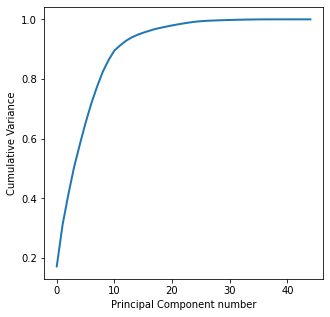

In [ ]:
# Θα τυπωσουμε το συσσωρευτικό ποσοστό διασποράς που εξηγείται από τις κύριες συνιστώσες
evar = pca.explained_variance_ratio_
cum_evar = np.cumsum(evar)
print(cum_evar)
plt.figure(1, figsize=(5, 5))
plt.xlabel("Principal Component number")
plt.ylabel('Cumulative Variance')
plt.plot(cum_evar, linewidth=2)
plt.show()

### Βελτιστοποίηση με χρήση pipelines

Στην συνέχεια θα χρησιμοποιήσουμε pipelines για να μελετήσουμε ειδικότερα την επίδραση διαφορετικών βελτιστοποιήσεων στην απόδοση των ταξινομητών βρίσκοντας ποιες υπερπαράμετροι σε κάθε ταξινομητή είναι οι βέλτιστες.

Για να το καταφέρουμε αυτό θα κάνουμε tuning υπερπαραμέτρων ώστε να βρούμε τους κατάλληλους συνδυασμούς που θα βελτιστοποιήσουν τους ταξινομητές μας (MLP,SVM).

Κάνουμε Grid-search με 5-fold-cross validation, το οποίο είναι χρονοβόρο. Κάνουμε cross validation με μετρική micro γιατί ενδείκνυται για imbalanced δεδομένα. Ωστόσο η τελική εκτύπωση της απόδοσης είναι σε macro.

Στην προεπεξεργασία μείωσαμε το variance των δεδομένων μας και είδαμε ότι οι τιμές της διασποράς είναι κοντά στο 0 (έχουμε απαλείψει προηγουμένως το ένα χαρακτηριστικό με μηδενική διασπορά). Τo variance thresholding μπορεί να θεωρηθεί ως υπερπαράμετρος, την οποία αρχικά εισάγαμε ως μέρος της αρχιτεκτονικής του pipeline αλλά παρατηρήσαμε πως πάντα επιλεγόταν threshold κάτω από το min των τιμών, δηλαδή τα αποτελέσματα είναι χειρότερα κάνοντας variance thresholding. Οπότε δεν αποτελεί τόσο χρήσιμη υπερπαράμετρο στο συγκεκριμένο πρόβλημα γιαυτό δεν την λαβάνουμε υπόψιν.

Η στρατηγική εύρεσης υπερπαραμέτρων που θα χρησιμοποιήσουμε είναι η ακόλουθη: Για κάθε ταξινομητή που θα μελετήσουμε (MLP , SVM_linear , SVM_rbf , SVM_poly) για τις δύο διαφορετικές τεχνικές oversampling(randomoversampling και SMOTE) και με PCA για τεχνική dimensionality reduction υπολογίζουμε τις υπερπαραμέτρους. Στη συνέχεια θα αναλύουμε πως επηρεάζει κάθε τεχνική την απόδοση και στο τέλος θα συγκρίνουμε με bar plots όλους τους ταξινομητές.

In [ ]:
!pip install --upgrade imbalanced-learn

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Using cached imbalanced_learn-0.9.1-py3-none-any.whl (199 kB)


In [ ]:
from imblearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report

from sklearn.svm import SVC
from sklearn.svm import LinearSVC

from imblearn.over_sampling import RandomOverSampler
from imblearn.over_sampling import SMOTE

from sklearn.feature_selection import VarianceThreshold
from sklearn.decomposition import FactorAnalysis

from sklearn.decomposition import PCA

#### *MLP*

Για τη βελτιστοποίηση του ταξινομητή MLP θα χρησιμοποιήσουμε τη βιβλιοθήκη Optuna.

In [ ]:
!pip install --upgrade optuna

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 348 kB 6.7 MB/s 
     |████████████████████████████████| 209 kB 55.4 MB/s 
     |████████████████████████████████| 81 kB 10.5 MB/s 
     |████████████████████████████████| 78 kB 7.2 MB/s 
     |████████████████████████████████| 112 kB 46.9 MB/s 
     |████████████████████████████████| 50 kB 6.4 MB/s 
     |████████████████████████████████| 147 kB 56.3 MB/s 
  Created wheel for pyperclip: filename=pyperclip-1.8.2-py3-none-any.whl size=11136 sha256=6ab9fb65b8f74e24b97c917f4adf7f07f267e70de1103e4bc7411a0e0cb29e11
  Stored in directory: /root/.cache/pip/wheels/9f/18/84/8f69f8b08169c7bae2dde6bd7daf0c19fca8c8e500ee620a28
Successfully built pyperclip


In [ ]:
from sklearn.neural_network import MLPClassifier
import optuna

In [ ]:
f1_macro_optimized_MLP = [] #εδώ θα βάλουμε τα F1-scores από το τρέξιμο των βελτιστοποίησεων

In [ ]:
def objective(trial, x_train, y_train , x_test , y_test):

    pca = PCA(n_components=45)
    x_train = pca.fit_transform(x_train)
    x_test = pca.transform(x_test)
    
    n_layers = trial.suggest_int('n_layers', 1, 2 )           #number of layers

    layers = []
    for i in range(n_layers):
        layers.append(trial.suggest_int(f'n_units_{i}', 10, 20 ))      #space of neurons per layer

    #alpha=trial.suggest_loguniform('alpha',1e-4,100)     # penalty  parameter.
    #tol=trial.suggest_float('tol',1e-8,1e-4)             # tol

    clf = MLPClassifier(hidden_layer_sizes=tuple(layers), max_iter=1000)

    clf.fit(x_train, y_train)

    score = clf.score(x_test, y_test)

    f1_macro_optimized_MLP.append(score)

    return score

In [ ]:
#for RandomOversampling
study = optuna.create_study(direction='maximize')
print("THIS IS PCA")
study.optimize(lambda trial: objective(trial, x_train_over, y_train_over, test_reduced, y_test) , n_trials=3) 

[I 2022-11-25 14:25:34,879] A new study created in memory with name: no-name-5c57e0fd-3043-4fc2-8ba5-d43d14e24f5b


THIS IS PCA


[I 2022-11-25 14:26:15,621] Trial 0 finished with value: 0.9486803519061584 and parameters: {'n_layers': 2, 'n_units_0': 17, 'n_units_1': 18}. Best is trial 0 with value: 0.9486803519061584.
[I 2022-11-25 14:27:00,592] Trial 1 finished with value: 0.9457478005865103 and parameters: {'n_layers': 2, 'n_units_0': 13, 'n_units_1': 11}. Best is trial 0 with value: 0.9486803519061584.
[I 2022-11-25 14:27:20,464] Trial 2 finished with value: 0.9599217986314761 and parameters: {'n_layers': 2, 'n_units_0': 17, 'n_units_1': 13}. Best is trial 2 with value: 0.9599217986314761.


In [ ]:
#for SMOTE
study = optuna.create_study(direction='maximize')
print("THIS IS PCA")
study.optimize(lambda trial: objective(trial, x_train_smote, y_train_smote, test_reduced, y_test) , n_trials=3) 

[I 2022-11-25 14:27:20,477] A new study created in memory with name: no-name-d2975873-aec2-4afd-9cbb-2c99f5cc352e


THIS IS PCA


[I 2022-11-25 14:27:47,941] Trial 0 finished with value: 0.947702834799609 and parameters: {'n_layers': 1, 'n_units_0': 15}. Best is trial 0 with value: 0.947702834799609.
[I 2022-11-25 14:28:17,988] Trial 1 finished with value: 0.9457478005865103 and parameters: {'n_layers': 2, 'n_units_0': 12, 'n_units_1': 19}. Best is trial 0 with value: 0.947702834799609.
[I 2022-11-25 14:28:39,562] Trial 2 finished with value: 0.9286412512218963 and parameters: {'n_layers': 1, 'n_units_0': 16}. Best is trial 0 with value: 0.947702834799609.


#### *SVM*

Για την βελτιστοποίηση των SVM ταξινομητών θα χρησιμοοιήσουμε την skicit-learn

In [ ]:
f1_macro_scoreslist_SVM = [] #εδώ θα βάλουμε τα F1-scores από το τρέξιμο των βελτιστοποίησεων

In [ ]:
def gridsearch_class_report(classifier, param_grid, pipe, train, train_labels, test, test_labels):

                                                # X_train_minmax , y_train , X_test_minmax , y_test

    # We will use 5 fold validation
    estimator = GridSearchCV(pipe, param_grid=param_grid, cv=5, scoring='f1_micro', n_jobs=-1, verbose=10)

    %time estimator.fit(train, train_labels)
    
    
    preds = estimator.predict(test)                         #test = X_test_minmax
    
    print(classification_report(test_labels, preds))

    print(estimator.best_estimator_)
    print(estimator.best_params_)

    #f1_acc_optimized[classifier] = rep_dict['accuracy']

    # Compute confusion matrix
    pred = estimator.predict(test)
    print("Confusion matrix\n")
    cnf_matrix = confusion_matrix(test_labels, pred)
    print(classifier, "Classifier", )
    print(cnf_matrix, end='\n\n')

    rep_dict = classification_report(test_labels, preds, output_dict = True)

    f1_macro_scoreslist_SVM.append(rep_dict['weighted avg']['f1-score'])
    #f1_macro_optimized[classifier] = mylist 

##### **linear**

Για αρχή δοκιμάζω τα παρακάτω διαστήματα για τις υπερπαραμέτρους:



In [ ]:
#dimensionality reduction params
vthreshold = [0.001, 0.003 , 0.005]

#linear_svm params
loss = ["hinge", "squared_hinge"]        # default ‘squared_hinge’
tol = [1e-4, 1e-8, 1e-14]                 # default 1e-3
c = [1, 10, 30, 50, 70]

linear_svm = LinearSVC()
selector = VarianceThreshold()
sampler = RandomOverSampler()


param_grid = dict(selector__threshold=vthreshold , linearsvm__loss = loss, linearsvm__tol = tol , linearsvm__C = c)

pipe = Pipeline(steps=[('sampler' , sampler) , ('selector', selector), ('linearsvm', linear_svm) ], memory = 'tmp')

gridsearch_class_report('SVM_linear', param_grid, pipe, x_train_minmax, y_train, x_test_minmax, y_test)

Fitting 5 folds for each of 90 candidates, totalling 450 fits
CPU times: user 6.32 s, sys: 320 ms, total: 6.64 s
Wall time: 5min 26s
              precision    recall  f1-score   support

           0       0.99      0.94      0.96      1987
           1       0.23      0.64      0.34        59

    accuracy                           0.93      2046
   macro avg       0.61      0.79      0.65      2046
weighted avg       0.97      0.93      0.94      2046

Pipeline(memory='tmp',
         steps=[('sampler', RandomOverSampler()),
                ('selector', VarianceThreshold(threshold=0.001)),
                ('linearsvm', LinearSVC(C=70, tol=1e-08))])
{'linearsvm__C': 70, 'linearsvm__loss': 'squared_hinge', 'linearsvm__tol': 1e-08, 'selector__threshold': 0.001}
Confusion matrix

SVM_linear Classifier
[[1860  127]
 [  21   38]]



Μετά από αρκετές δοκιμές βρίσκω καλύτερες τιμές για τις υπερπαραμέτρους.

In [ ]:
#dimensionality reduction params
vthreshold = [0.001, 0.002 , 0.003]

#linear_svm params
loss = ["hinge", "squared_hinge"]        # default ‘squared_hinge’
tol = [1e-10, 1e-12, 1e-14]                 # default 1e-3
c = [63, 65, 68, 70]

linear_svm = LinearSVC()
selector = VarianceThreshold()
sampler = RandomOverSampler()


param_grid = dict(selector__threshold=vthreshold , linearsvm__loss = loss, linearsvm__tol = tol , linearsvm__C = c)

pipe = Pipeline(steps=[('sampler' , sampler) , ('selector', selector), ('linearsvm', linear_svm) ], memory = 'tmp')

gridsearch_class_report('SVM_linear', param_grid, pipe, x_train_minmax, y_train, x_test_minmax, y_test)

Fitting 5 folds for each of 72 candidates, totalling 360 fits
CPU times: user 5.43 s, sys: 353 ms, total: 5.78 s
Wall time: 5min 57s
              precision    recall  f1-score   support

           0       0.99      0.91      0.95      1987
           1       0.19      0.69      0.30        59

    accuracy                           0.91      2046
   macro avg       0.59      0.80      0.62      2046
weighted avg       0.97      0.91      0.93      2046

Pipeline(memory='tmp',
         steps=[('sampler', RandomOverSampler()),
                ('selector', VarianceThreshold(threshold=0.002)),
                ('linearsvm', LinearSVC(C=68, tol=1e-10))])
{'linearsvm__C': 68, 'linearsvm__loss': 'squared_hinge', 'linearsvm__tol': 1e-10, 'selector__threshold': 0.002}
Confusion matrix

SVM_linear Classifier
[[1812  175]
 [  18   41]]



Μετά από δοκιμές (μετατοπίζοντας το διάστημα των αντίστοιχων υπερπαραμέτρων) οι βέλτιστοι είναι C = 68-70, tol = 1e-10, loss = squared hinge και threshold = 0.002.

Δοκιμάζω τώρα με τεχνική oversampling **SMOTE**.

In [ ]:
#dimensionality reduction params
vthreshold = [0.001, 0.002 , 0.003]

#linear_svm params
loss = ["hinge", "squared_hinge"]      
tol = [1e-10, 1e-12, 1e-14]                 # default 1e-3
c = [63, 65, 68, 70]

linear_svm = LinearSVC()
selector = VarianceThreshold()
sampler = SMOTE()

param_grid = dict(selector__threshold=vthreshold , linearsvm__loss = loss, linearsvm__tol = tol , linearsvm__C = c)

pipe = Pipeline(steps=[('sampler' , sampler) , ('selector', selector), ('linearsvm', linear_svm) ], memory = 'tmp')

gridsearch_class_report('SVM_linear', param_grid, pipe, x_train_minmax, y_train, x_test_minmax, y_test) 

Fitting 5 folds for each of 72 candidates, totalling 360 fits
CPU times: user 4.25 s, sys: 390 ms, total: 4.64 s
Wall time: 4min 6s
              precision    recall  f1-score   support

           0       0.99      0.86      0.92      1987
           1       0.15      0.85      0.26        59

    accuracy                           0.86      2046
   macro avg       0.57      0.85      0.59      2046
weighted avg       0.97      0.86      0.90      2046

Pipeline(memory='tmp',
         steps=[('sampler', SMOTE()),
                ('selector', VarianceThreshold(threshold=0.002)),
                ('linearsvm', LinearSVC(C=68, tol=1e-10))])
{'linearsvm__C': 68, 'linearsvm__loss': 'squared_hinge', 'linearsvm__tol': 1e-10, 'selector__threshold': 0.002}
Confusion matrix

SVM_linear Classifier
[[1704  283]
 [   9   50]]



Παρατηρούμε ότι πέφτει ελαφρώς η ακρίβεια με την τεχνική SMOTE.

Προχωράμε με τη μέθοδο PCA για να δουμε αν θα βελτιωθεί η απόδοση τόσο με RandomOverSampler όσο και SMOTE:

**PCA**

In [ ]:
selector = PCA()

#dimensionality reduction params
pca_components = [ 50 , 60 , 70 , 80 ]

#linear_svm params
loss = ["hinge", "squared_hinge"]        
tol = [1e-10, 1e-12, 1e-14]                 # default 1e-3
c = [63, 65, 68, 70]

linear_svm = LinearSVC()
sampler = RandomOverSampler()

param_grid = dict(selector__n_components=pca_components , linearsvm__loss = loss, linearsvm__tol = tol , linearsvm__C = c)

pipe = Pipeline(steps=[ ('sampler', sampler), ('selector', selector), ('linearsvm' , linear_svm) ] , memory = 'tmp')

gridsearch_class_report('SVM_linear', param_grid, pipe, x_train_minmax, y_train, x_test_minmax, y_test)

Fitting 5 folds for each of 96 candidates, totalling 480 fits
CPU times: user 6.73 s, sys: 459 ms, total: 7.19 s
Wall time: 6min 37s
              precision    recall  f1-score   support

           0       0.99      0.88      0.93      1987
           1       0.15      0.75      0.26        59

    accuracy                           0.87      2046
   macro avg       0.57      0.81      0.59      2046
weighted avg       0.97      0.87      0.91      2046

Pipeline(memory='tmp',
         steps=[('sampler', RandomOverSampler()),
                ('selector', PCA(n_components=80)),
                ('linearsvm', LinearSVC(C=68, tol=1e-14))])
{'linearsvm__C': 68, 'linearsvm__loss': 'squared_hinge', 'linearsvm__tol': 1e-14, 'selector__n_components': 80}
Confusion matrix

SVM_linear Classifier
[[1746  241]
 [  15   44]]



In [ ]:
selector = PCA()

#dimensionality reduction params
pca_components = [ 50 , 60 , 70 , 80 ]

#linear_svm params
loss = ["hinge", "squared_hinge"]       
tol = [1e-10, 1e-12, 1e-14]                 # default 1e-3
c = [63, 65, 68, 70]

linear_svm = LinearSVC()
sampler = SMOTE()

param_grid = dict(selector__n_components=pca_components , linearsvm__loss = loss, linearsvm__tol = tol , linearsvm__C = c)

pipe = Pipeline(steps=[ ('sampler', sampler), ('selector', selector), ('linearsvm' , linear_svm) ] , memory = 'tmp')

gridsearch_class_report('SVM_linear', param_grid, pipe, x_train_minmax, y_train, x_test_minmax, y_test)

Fitting 5 folds for each of 96 candidates, totalling 480 fits
CPU times: user 6.28 s, sys: 425 ms, total: 6.71 s
Wall time: 5min 15s
              precision    recall  f1-score   support

           0       0.99      0.90      0.94      1987
           1       0.17      0.71      0.28        59

    accuracy                           0.89      2046
   macro avg       0.58      0.81      0.61      2046
weighted avg       0.97      0.89      0.92      2046

Pipeline(memory='tmp',
         steps=[('sampler', SMOTE()), ('selector', PCA(n_components=80)),
                ('linearsvm', LinearSVC(C=65, tol=1e-10))])
{'linearsvm__C': 65, 'linearsvm__loss': 'squared_hinge', 'linearsvm__tol': 1e-10, 'selector__n_components': 80}
Confusion matrix

SVM_linear Classifier
[[1788  199]
 [  17   42]]



Συμπεράσματα για linear kernel:

* Aφού βρούμε τις κατάλληλες υπερπαραμέτρους loss, tol, C το μοντέλο ισορροπεί γύρω από μία συγκεκριμένη απόδοση και μικροαλλαγές δεν επιφέρουν ουσιαστική αλλαγή(βελτίωση) στην απόδοση και αυτό οφείλεται στο ότι τα δεδομένα μας δεν είναι γραμμικά διαχωρίσιμα.
* Καλύτερη απόδοση (με πολύ μικρή διαφορά) εμφανίζεται με RandomOverSampler εξισορρόπηση ανεξάρτητα.

Για τους υπόλοιπους kernels θα χρησιμοποιήσουμε μόνο pca ως μεθόδους μείωσης διάστασης.

##### **rbf**

Η Radial Basis Function που χρησιμοποιείται σε αυτόν τον kernel περιέχει την υπερπαράμετρο gamma.

In [ ]:
sampler = RandomOverSampler()
selector = PCA()

gamma = ['scale'] 

pca_components = [ 10, 40 , 70 , 80, 90 ]
tol = [1e-3, 1e-4] 
c = [110, 120, 130] 

rbf_svc = SVC(kernel='rbf')

param_grid = dict(selector__n_components=pca_components , rbfsvc__gamma = gamma,  rbfsvc__tol = tol , rbfsvc__C = c)

pipe = Pipeline(steps=[ ('sampler', sampler), ('selector', selector), ('rbfsvc', rbf_svc) ] , memory = 'tmp')

gridsearch_class_report('SVM_rbf', param_grid, pipe, x_train_minmax, y_train, x_test_minmax, y_test)

Fitting 5 folds for each of 30 candidates, totalling 150 fits
CPU times: user 3.78 s, sys: 490 ms, total: 4.27 s
Wall time: 2min 34s
              precision    recall  f1-score   support

           0       0.98      0.98      0.98      1987
           1       0.25      0.27      0.26        59

    accuracy                           0.96      2046
   macro avg       0.62      0.62      0.62      2046
weighted avg       0.96      0.96      0.96      2046

Pipeline(memory='tmp',
         steps=[('sampler', RandomOverSampler()),
                ('selector', PCA(n_components=70)), ('rbfsvc', SVC(C=120))])
{'rbfsvc__C': 120, 'rbfsvc__gamma': 'scale', 'rbfsvc__tol': 0.001, 'selector__n_components': 70}
Confusion matrix

SVM_rbf Classifier
[[1940   47]
 [  43   16]]



Η κύρια υπερπαράμετρος είναι η gamma και έπειτα από αρκετά πειράματα διαλέγω gamma = scale και δοκιμάζοντας διάφορες παραμέτρους διαλέγω C = 120, tol = 1e-3 και pca γύρω από το 70.

In [ ]:
sampler = SMOTE()
selector = PCA()

gamma = ['scale'] # default scale

pca_components = [ 10, 40 , 70 , 80, 90 ]
tol = [1e-3, 1e-4] 
c = [110, 120, 130] 

rbf_svc = SVC(kernel='rbf')

param_grid = dict(selector__n_components=pca_components , rbfsvc__gamma = gamma,  rbfsvc__tol = tol , rbfsvc__C = c)

pipe = Pipeline(steps=[ ('sampler', sampler), ('selector', selector), ('rbfsvc', rbf_svc) ] , memory = 'tmp')

gridsearch_class_report('SVM_rbf', param_grid, pipe, x_train_minmax, y_train, x_test_minmax, y_test)

Fitting 5 folds for each of 30 candidates, totalling 150 fits
CPU times: user 2.92 s, sys: 147 ms, total: 3.07 s
Wall time: 2min 16s
              precision    recall  f1-score   support

           0       0.98      0.98      0.98      1987
           1       0.25      0.25      0.25        59

    accuracy                           0.96      2046
   macro avg       0.61      0.62      0.61      2046
weighted avg       0.96      0.96      0.96      2046

Pipeline(memory='tmp',
         steps=[('sampler', SMOTE()), ('selector', PCA(n_components=80)),
                ('rbfsvc', SVC(C=110))])
{'rbfsvc__C': 110, 'rbfsvc__gamma': 'scale', 'rbfsvc__tol': 0.001, 'selector__n_components': 80}
Confusion matrix

SVM_rbf Classifier
[[1941   46]
 [  44   15]]



Συμπεράσματα για τον rbf kernel:

* Υπερέχει του linear kernel, διότι με το kernel trick αυξάνονται οι διαστάσεις και τα data διαχωρίζονται, οπότε η ταξινόμηση γίνεται πιο αποδοτικά. Καταλήξαμε στην μεταβληρή gamma = scale αντί του auto. Επίσης, παρατηρούμε επειδή έχουμε μικρό variance στα δεδομένα μας πως η τιμή του gamma αυξάνει και όταν βάλαμε δοκιμαστικά μεγαλύτερες τιμές και ο χρόνος βελτιώθηκε αλλά η απόδοση έπεσε, κάτι που περιμέναμε.
* Και εδώ παρατηρούμε ότι μειώνεται ελάχιστα η απόδοση όταν χρησιμοποιούμε SMOTE oversampling.
υπάρχει βελτίωση απόδοσης (κατά 1%) με factor analysis έναντι της PCA ως τεχνική μείωσης διαστάσεων.

Προφανώς καλύτερη τεχνική τόσο σε χρόνο όσο και σε απόδοση από την linear kernel.

##### **poly**

O poly(πολυωνυμικός) kernel έχει μια επιπλεόν υπερπαράμετρο, την degree, που είναι ο βαθμός του πολυωνύμου που χρησιμοποιούμε. Για degree=1 είναι η περίπτωση του linear kernel.

In [ ]:
sampler = RandomOverSampler()

selector = PCA()

#dimensionality reduction params
pca_components = [ 45, 50 , 55 ]

#poly_svm params
degree = [ 3, 4 , 5, 6]
tol = [1e-3, 1e-4]                
c = [35 , 40, 45 ]

poly_svm = SVC(kernel='poly')

param_grid = dict(selector__n_components=pca_components , polysvm__tol = tol , polysvm__C = c, polysvm__degree = degree)

pipe = Pipeline(steps=[ ('sampler', sampler), ('selector', selector), ('polysvm' , poly_svm) ] , memory = 'tmp')

gridsearch_class_report('SVM_poly', param_grid, pipe, x_train_minmax, y_train, x_test_minmax, y_test)

Fitting 5 folds for each of 72 candidates, totalling 360 fits
CPU times: user 4.95 s, sys: 450 ms, total: 5.4 s
Wall time: 4min 37s
              precision    recall  f1-score   support

           0       0.98      0.96      0.97      1987
           1       0.24      0.42      0.31        59

    accuracy                           0.95      2046
   macro avg       0.61      0.69      0.64      2046
weighted avg       0.96      0.95      0.95      2046

Pipeline(memory='tmp',
         steps=[('sampler', RandomOverSampler()),
                ('selector', PCA(n_components=45)),
                ('polysvm', SVC(C=40, degree=5, kernel='poly'))])
{'polysvm__C': 40, 'polysvm__degree': 5, 'polysvm__tol': 0.001, 'selector__n_components': 45}
Confusion matrix

SVM_poly Classifier
[[1909   78]
 [  34   25]]



Έπειτα από δοκιμές διαλέγουμε degree = 4.

In [ ]:
sampler = SMOTE()

selector = PCA()

#dimensionality reduction params
pca_components = [ 45, 50 , 55 ]

#poly_svm params
degree = [ 3, 4 , 5, 6]
tol = [1e-3, 1e-4]                
c = [35 , 40, 45 ]

poly_svm = SVC(kernel='poly')

param_grid = dict(selector__n_components=pca_components , polysvm__tol = tol , polysvm__C = c , polysvm__degree= degree)

pipe = Pipeline(steps=[ ('sampler', sampler), ('selector', selector), ('polysvm' , poly_svm) ] , memory = 'tmp')

gridsearch_class_report('SVM_poly', param_grid, pipe, x_train_minmax, y_train, x_test_minmax, y_test)

Fitting 5 folds for each of 72 candidates, totalling 360 fits
CPU times: user 5.2 s, sys: 561 ms, total: 5.76 s
Wall time: 5min 22s
              precision    recall  f1-score   support

           0       0.98      0.96      0.97      1987
           1       0.20      0.31      0.24        59

    accuracy                           0.95      2046
   macro avg       0.59      0.63      0.61      2046
weighted avg       0.96      0.95      0.95      2046

Pipeline(memory='tmp',
         steps=[('sampler', SMOTE()), ('selector', PCA(n_components=45)),
                ('polysvm', SVC(C=45, degree=4, kernel='poly'))])
{'polysvm__C': 45, 'polysvm__degree': 4, 'polysvm__tol': 0.001, 'selector__n_components': 45}
Confusion matrix

SVM_poly Classifier
[[1917   70]
 [  41   18]]



Συμπεράσματα για τον poly kernel:

* Καταλήγουμε σε βαθμό πολυωνύμου 4 και παρατηρούμε ότι όσο αυξάνουμε τον βαθμό του πολυωνύμου τόσο αυξάνεται και ο χρόνος "εκπαίδευσης" του μοντέλου.
* Και εδώ το SMOTE μειώνει σχεδόν ανεπαίσθητα την απόδοση.

### Markdown πίνακας

| Classifier\Score | F1 - macro |
|:----:|:------:|
| **MLP**| 0.9599  |
| **SVM_linear**| 0.9306 |
| **SVM_rbf** | 0.9567 |
| **SVM_poly** | 0.9523 |

### Bar plots

In [ ]:
from statistics import mean

In [ ]:
#MLP
f1_macro_MLP_splitted = [f1_macro_optimized_MLP[x:x+3] for x in range(0, 6, 3)]
f1_macro_MLP_splitted

f1_macro_MLP_max = [max(sublist) for sublist in f1_macro_MLP_splitted]

f1_macro_MLP = max(f1_macro_MLP_max) 

print(f1_macro_MLP)

0.9599217986314761


In [ ]:
#SVM
f1_macro_SVM_kernel = max(f1_macro_scoreslist_SVM[1:5])

f1_macro_SVM_rbf = max(f1_macro_scoreslist_SVM[5:7])

f1_macro_SVM_poly = max(f1_macro_scoreslist_SVM[7:9])

f1_optimized_values = [f1_macro_MLP , f1_macro_SVM_kernel , f1_macro_SVM_rbf , f1_macro_SVM_poly]
f1_optimized_values

[0.9599217986314761, 0.9306566523022614, 0.9567106890448132, 0.952386561355343]

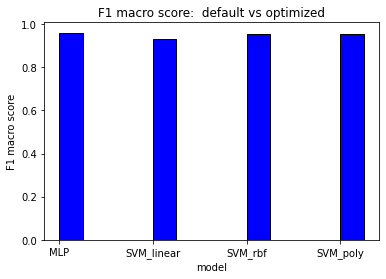

In [ ]:
#plot
n=4
r = np.arange(n)
width = 0.25
  
percent_f1_optimized_values = [element for element in f1_optimized_values]

plt.bar(r + width, percent_f1_optimized_values , color = 'b', width = width, edgecolor = 'black')
  
plt.xlabel("model")
plt.ylabel("F1 macro score")
plt.title("F1 macro score:  default vs optimized")
  
# plt.grid(linestyle='--')
plt.xticks(r + width/2, ['MLP','SVM_linear','SVM_rbf','SVM_poly'])
  
plt.show()

Γενικά συμπεράσματα ύστερα από αρκετές "εκπαιδεύσεις" του μοντέλου:

Γενικά βελτιώνεται ουσιαστικά η απόδοση με την βελτιστοποίηση, όπως ήταν και ο στόχος.

O MLP έχει την βέλτιστη απόδοση ωστόσο δεν είναι σταθερή, υπάρχουν απότομες διακυμάνσεις μεταξύ 0.93-0.95. Αυτό οφείλεται στο ότι το MLP έχει μη κυρτή συνάρτηση κόστους με πολλές υπερπαραμέτρους, οπότε είναι δύσκολο να βρεθούν τιμές για όλες.

Από τους SVC ο rbf έχει τη βέλτιστη απόδοση πάντα και ακολουθεί ο πολυωνυμικός με πολυώνυμο βαθμού 4. Ο kernel linear έχει τη χειρότερη, όπως αναμενόταν, αφού τα data δεν είναι γραμμικά διαχωρίσιμα.

Η χρήση του framework Optuna για την μελέτη απόδοσης του MLP προσφέρει ταχύτητα σε αντίθεση με το scikit learn, άρα γενικά ο MLP ταξινομητής θερωείται αρκετά καλή επιλογή. Από τους SVC o rbf έχει τόσο την καλύτερη απόδοση όσο και χρόνο εκπαίδευσης.